In [1]:
import cv2
import matplotlib.pyplot as plt
from rembg import remove 
from PIL import Image
import numpy as np

In [2]:
path = "Image1/Capsule-shape/000031967.jpg"

In [3]:
img1 = Image.open(path)
img2 = remove(img1)

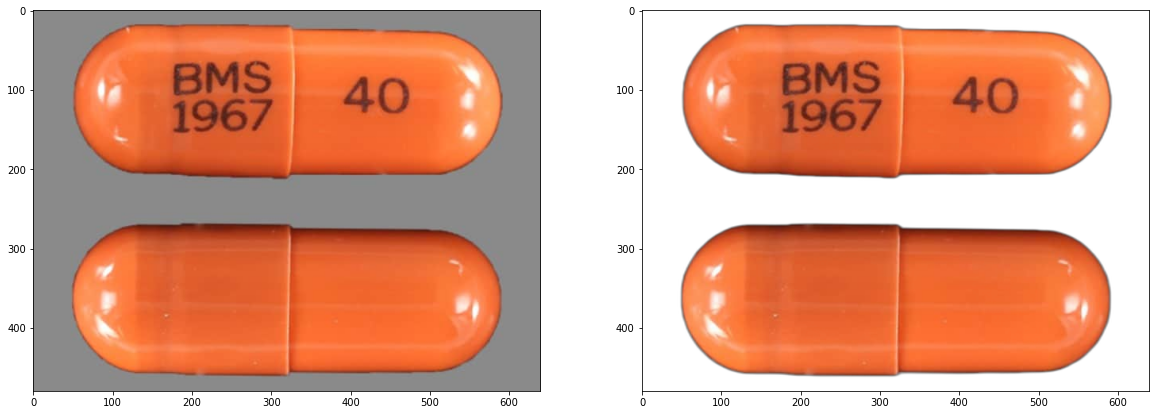

In [4]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)

In [5]:
img2.save("1.png")

In [6]:
img = cv2.imread('1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

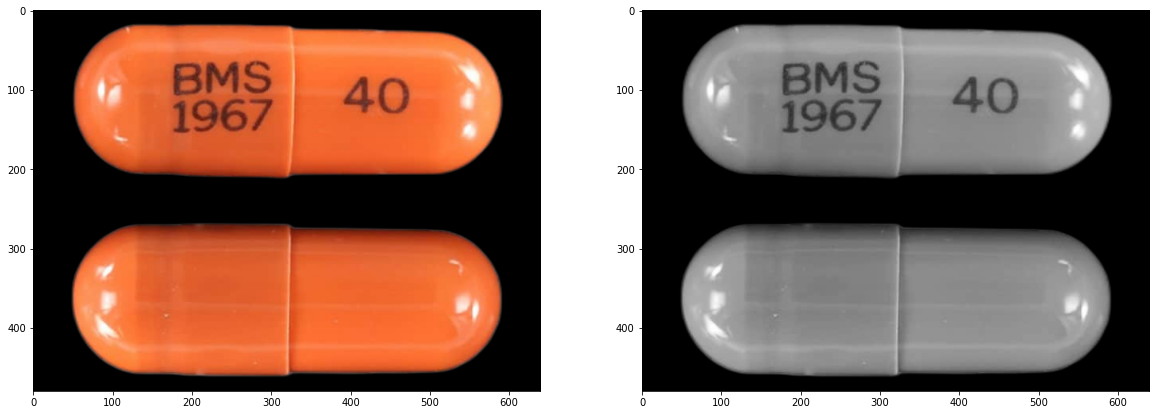

In [7]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(gray, cmap="gray")

In [8]:
# Apply a threshold to create a binary image
edged = cv2.Canny(gray, 30, 200)
ret, thresh = cv2.threshold(edged, 10, 255, cv2.THRESH_BINARY)

In [9]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

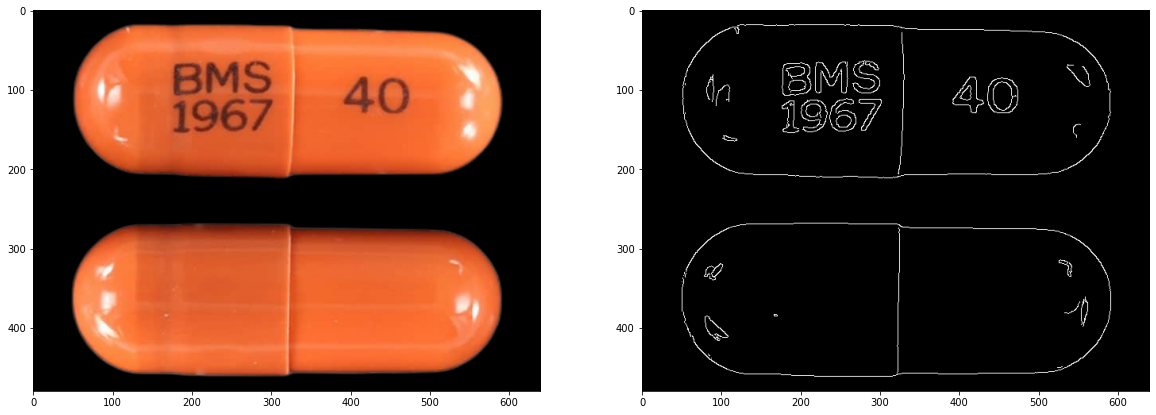

In [10]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(thresh, cmap="gray")

In [36]:
contours[0].shape

(12, 1, 2)

In [45]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('1.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to create a binary image
# edged = cv2.Canny(gray, 30, 200)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
(contours, _) = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.ones(img.shape[:2], dtype="uint8") * 255

# Draw the contours on the mask
# cv2.drawContours(mask, contours, -1, 0, -1)

# remove the contours from the image and show the resulting images
img = cv2.bitwise_and(img, img, mask=mask)
# cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
# Display the image with the detected rectangles
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
import cv2
import numpy as np

img = cv2.imread('1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for i in range(len(contours)):
    x, y, width, height = cv2.boundingRect(contours[i])
    roi = img[y:y+height, x:x+width]
    cv2.imwrite(f"D1/d{i}.png", roi)

In [12]:
import cv2
import numpy as np
list_name = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_90_COUNTERCLOCKWISE]
img = cv2.imread('1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for i in range(len(contours)):
    x, y, width, height = cv2.boundingRect(contours[i])
    src = img[y:y+height, x:x+width]
    tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    _, alpha = cv2.threshold(tmp, 10, 255, cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)
    b, g, r = cv2.split(src)
    rgba = [b, g, r, alpha]
    dst = cv2.merge(rgba, 10)
    # print(dst.shape)
    if dst.shape[0] < dst.shape[1]:
        for j in list_name:
            dst1 = cv2.rotate(dst, j)
            cv2.imwrite(f"D1/1gfg{i}_{j}.png", dst1)
    else:
        cv2.imwrite(f"D1/1gfg{i}_{2}.png", dst)
    # cv2.imwrite(f"D1/d{i}.png", roi)

In [63]:
import cv2
import numpy as np

img = cv2.imread('1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for i in range(len(contours)):
    x, y, width, height = cv2.boundingRect(contours[i])
    src = img[y:y+height, x:x+width]
    tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    _, alpha = cv2.threshold(tmp, 10, 255, cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)
    b, g, r = cv2.split(src)
    rgba = [b, g, r, alpha]
    dst = cv2.merge(rgba, 10)
    print
    dst = cv2.rotate(dst, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite(f"D1/1gfg{i}.png", dst)
    # cv2.imwrite(f"D1/d{i}.png", roi)

In [62]:
# Import the library OpenCV
import cv2

# Import the image
file_name = "D1/d1.png"

# Read the image
src = cv2.imread(file_name, 1)

# Convert image to image gray
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Applying thresholding technique
_, alpha = cv2.threshold(tmp, 10, 255, cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)

# Using cv2.split() to split channels
# of coloured image
b, g, r = cv2.split(src)

# Making list of Red, Green, Blue
# Channels and alpha
rgba = [b, g, r, alpha]

# Using cv2.merge() to merge rgba
# into a coloured/multi-channeled image
dst = cv2.merge(rgba, 10)

# Writing and saving to a new image
cv2.imwrite("D1/gfg_white.png", dst)


True

```python

import cv2
import numpy as np

# Load the image
img = cv2.imread('1.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to create a binary image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter out contours that do not correspond to rectangles
shapes = []
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    if len(approx) == 4 and aspect_ratio > 0.8 and aspect_ratio < 1.2:
        shapes.append(approx)

# Draw the detected rectangles on the original image
cv2.drawContours(img, shapes, -1, (0, 255, 0), 3)

# Display the image with the detected rectangles
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('1.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to create a binary image
# edged = cv2.Canny(gray, 30, 200)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for i ran g
x, y, width, height = cv2.boundingRect(contours[-1])
roi = img[y:y+height, x:x+width]

# Filter out contours that do not correspond to rectangles
# shapes = []
# for contour in contours:
#     approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
#     x, y, w, h = cv2.boundingRect(contour)
#     aspect_ratio = float(w) / h
#     if len(approx) == 4 and aspect_ratio > 0.8 and aspect_ratio < 1.2:
#         shapes.append(approx)

# # Draw the detected rectangles on the original image
# cv2.drawContours(img, shapes, -1, (0, 255, 0), 3)
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
# Display the image with the detected rectangles
cv2.imshow('img', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Insert image

In [15]:

import cv2 

import numpy as np 

image2 = cv2.imread('background/image_convert3.jpg') 
image1=cv2.imread('D1/1gfg0_2.png')
image1 = 
# image1=np.resize(image1,image2.shape)
added_images = cv2.add(image1,image2)

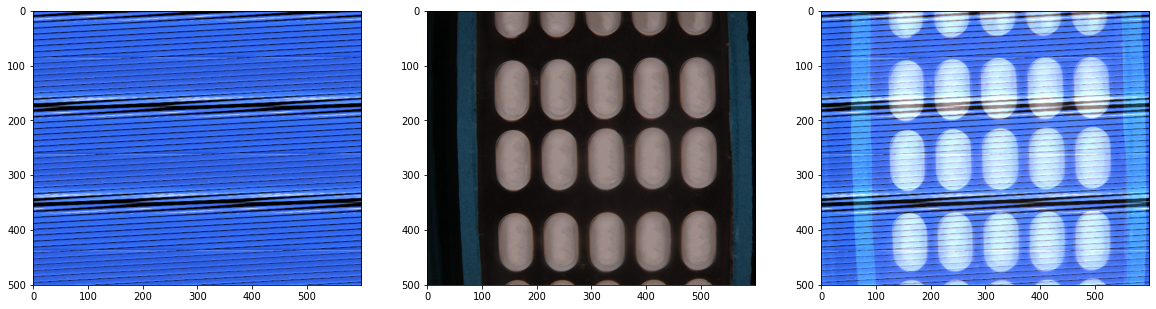

In [16]:
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.imshow(image1)
plt.subplot(132)
plt.imshow(image2)
plt.subplot(133)
plt.imshow(added_images)

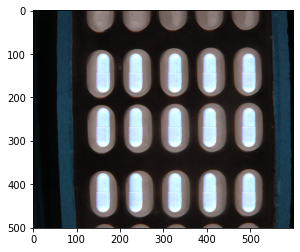

In [39]:
import cv2

background_img = cv2.imread('background/image_convert3.jpg')
overlay_img = cv2.imread('D1/1gfg0_2.png')
scale1 = 6
overlay_img = cv2.resize(overlay_img, (int(overlay_img.shape[1]/scale1), int(overlay_img.shape[0]/scale1)))

list_position_x = [145, 220, 310, 390, 480]
list_position_y = [100, 225, 375]

for i, x_offset in enumerate(list_position_x):
    for j, y_offset in enumerate(list_position_y):
        overlay_img_height, overlay_img_width, _ = overlay_img.shape
        background_img_height, background_img_width, _ = background_img.shape

        background_img_roi = background_img[y_offset:y_offset+overlay_img_height, x_offset:x_offset+overlay_img_width]
        result_img = cv2.add(background_img_roi, overlay_img)
        background_img[y_offset:y_offset+overlay_img_height, x_offset:x_offset+overlay_img_width] = result_img

cv2.imwrite("D1/data.png", background_img)
plt.imshow(background_img)

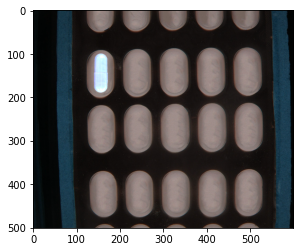

In [25]:
import cv2

background_img = cv2.imread('background/image_convert3.jpg')
overlay_img = cv2.imread('D1/1gfg0_2.png')
scale1 = 6
overlay_img = cv2.resize(overlay_img, (int(overlay_img.shape[1]/scale1), int(overlay_img.shape[0]/scale1)))

x_offset = 140
y_offset = 100

overlay_img_height, overlay_img_width, _ = overlay_img.shape
background_img_height, background_img_width, _ = background_img.shape

background_img_roi = background_img[y_offset:y_offset+overlay_img_height, x_offset:x_offset+overlay_img_width]
result_img = cv2.add(background_img_roi, overlay_img)
background_img[y_offset:y_offset+overlay_img_height, x_offset:x_offset+overlay_img_width] = result_img

cv2.imwrite("D1/data.png", background_img)
plt.imshow(background_img)

## Insert image in images with pillow.

In [41]:
im1 = Image.open('background/image_convert3.jpg')
im2 = Image.open('D1/1gfg0_2.png').resize((100, 100))

back_im = im1.copy()
back_im.paste(im2, (12, 12))
back_im.save('D1/rocket_pillow_paste.jpg', quality=95)
